In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [19]:
df_ordered = df_desordered = pd.DataFrame()

max_file_size = 100000

for file_size in range(5000,max_file_size+1,5000): 
    df_ordered = pd.concat([df_ordered, pd.read_csv(f'../results/out.o.{file_size}.txt')])
    df_desordered = pd.concat([df_desordered, pd.read_csv(f'../results/out.d.{file_size}.txt')])






In [20]:
df_ordered

,size,abp_insert,avl_insert,abp_fqe,abp_mqe,abp_lqe,avl_fqe,avl_mqe,avl_lqe,abp_rand_mean,avl_rand_mean
0,5000,0.147383,0.328000,0.000001,0.000010,0.000017,0.000001,0.000001,0.000001,0.000007,2.800000e-07
0,10000,0.533132,1.515868,0.000000,0.000025,0.000040,0.000001,0.000001,0.000001,0.000018,8.400000e-07
0,15000,1.295268,3.243424,0.000000,0.000040,0.000068,0.000001,0.000001,0.000000,0.000039,9.800000e-07
0,20000,2.258462,5.642309,0.000000,0.000054,0.000100,0.000001,0.000000,0.000001,0.000034,7.800000e-07
0,25000,3.623908,9.544186,0.000000,0.000376,0.000172,0.000000,0.000001,0.000001,0.000058,8.600000e-07
0,30000,5.233690,14.300388,0.000000,0.000068,0.000120,0.000001,0.000000,0.000000,0.000053,1.100000e-06
0,35000,7.123198,19.864460,0.000000,0.000077,0.000142,0.000001,0.000000,0.000001,0.000058,1.000000e-06
0,40000,9.730077,27.656667,0.000000,0.000104,0.000210,0.000000,0.000000,0.000001,0.000065,6.000000e-07
0,45000,12.738806,38.950785,0.000000,0.000148,0.000305,0.000001,0.000002,0.000001,0.000121,1.140000e-06
0,50000,16.642770,39.801631,0.000001,0.000147,0.000273,0.000001,0.000002,0.000001,0.000088,8.600000e-07


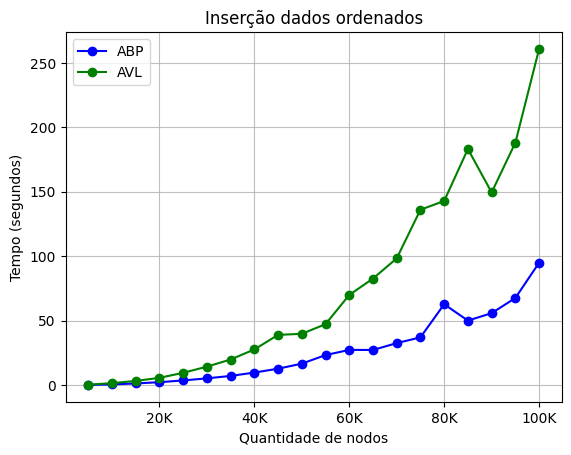

In [21]:
fig, ax = plt.subplots()

x = df_ordered['size']
y0 = df_ordered['abp_insert']
y1 = df_ordered['avl_insert']

ax.plot(x, y0, label='ABP', color='blue', marker='o')
ax.plot(x, y1, label='AVL', color='green', marker='o')

ax.set_title('Inserção dados ordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()

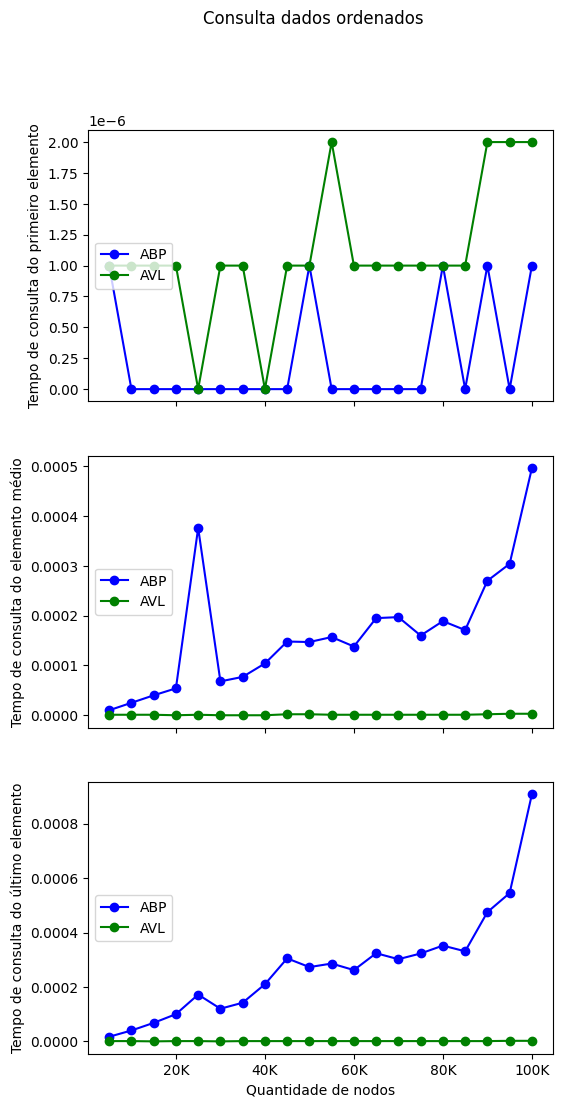

In [22]:
fig, axs = plt.subplots(nrows=3, figsize=(6,12), sharex=True)

x = df_ordered['size']

axs[0].plot(x, df_ordered['abp_fqe'], label='ABP', color='blue', marker='o')
axs[0].plot(x, df_ordered['avl_fqe'], label='AVL', color='green', marker='o')
axs[0].legend(loc='center left')
axs[0].set_ylabel('Tempo de consulta do primeiro elemento')

axs[1].plot(x, df_ordered['abp_mqe'], label='ABP', color='blue', marker='o')
axs[1].plot(x, df_ordered['avl_mqe'], label='AVL', color='green', marker='o')
axs[1].legend(loc='center left')
axs[1].set_ylabel('Tempo de consulta do elemento médio')


axs[2].plot(x, df_ordered['abp_lqe'], label='ABP', color='blue', marker='o')
axs[2].plot(x, df_ordered['avl_lqe'], label='AVL', color='green', marker='o')
axs[2].legend(loc='center left')
axs[2].set_ylabel('Tempo de consulta do último elemento')


axs[2].set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
axs[2].xaxis.set_major_formatter(formatter)
plt.suptitle('Consulta dados ordenados')
plt.show()

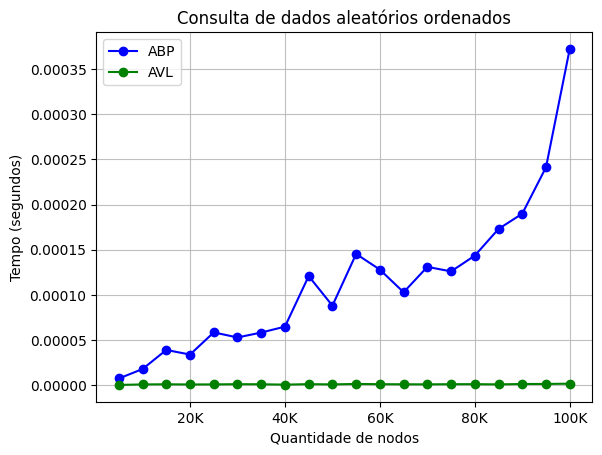

In [23]:
fig, ax = plt.subplots()

x = df_ordered['size']
y0 = df_ordered['abp_rand_mean']
y1 = df_ordered['avl_rand_mean']

ax.plot(x, y0, label='ABP', color='blue', marker='o')
ax.plot(x, y1, label='AVL', color='green', marker='o')

ax.set_title('Consulta de dados aleatórios ordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()

In [24]:
df_desordered

,size,abp_insert,avl_insert,abp_fqe,abp_mqe,abp_lqe,avl_fqe,avl_mqe,avl_lqe,abp_rand_mean,avl_rand_mean
0,5000,0.020690,0.653714,0.000002,0.000001,0.000000,0.000001,0.000000,0.000001,6.800000e-07,5.200000e-07
0,10000,0.040200,2.980273,0.000002,0.000001,0.000001,0.000000,0.000000,0.000000,1.040000e-06,4.200000e-07
0,15000,0.069875,7.036008,0.000001,0.000001,0.000001,0.000000,0.000001,0.000001,7.200000e-07,4.000000e-07
0,20000,0.076026,12.616383,0.000014,0.000009,0.000004,0.000001,0.000001,0.000000,3.860000e-06,7.600000e-07
0,25000,0.100433,21.538220,0.000002,0.000003,0.000001,0.000001,0.000000,0.000001,1.120000e-06,4.800000e-07
0,30000,0.117819,31.700020,0.000002,0.000005,0.000001,0.000002,0.000002,0.000002,1.600000e-06,1.080000e-06
0,35000,0.151870,45.035061,0.000001,0.000003,0.000001,0.000000,0.000001,0.000000,1.140000e-06,5.200000e-07
0,40000,0.180302,59.482722,0.000001,0.000003,0.000001,0.000000,0.000001,0.000000,9.800000e-07,4.600000e-07
0,45000,0.186813,80.386255,0.000002,0.000003,0.000001,0.000000,0.000001,0.000000,1.460000e-06,4.600000e-07
0,50000,0.207316,111.332334,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000,8.600000e-07,3.800000e-07


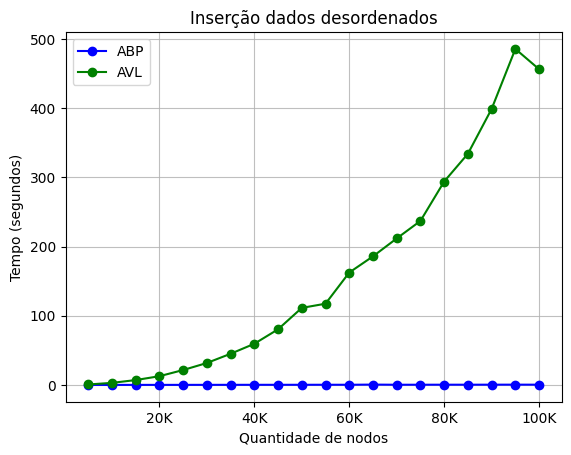

In [25]:
fig, ax = plt.subplots()

x = df_desordered['size']
y0 = df_desordered['abp_insert']
y1 = df_desordered['avl_insert']

ax.plot(x, y0, label='ABP', color='blue', marker='o')
ax.plot(x, y1, label='AVL', color='green', marker='o')

ax.set_title('Inserção dados desordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()

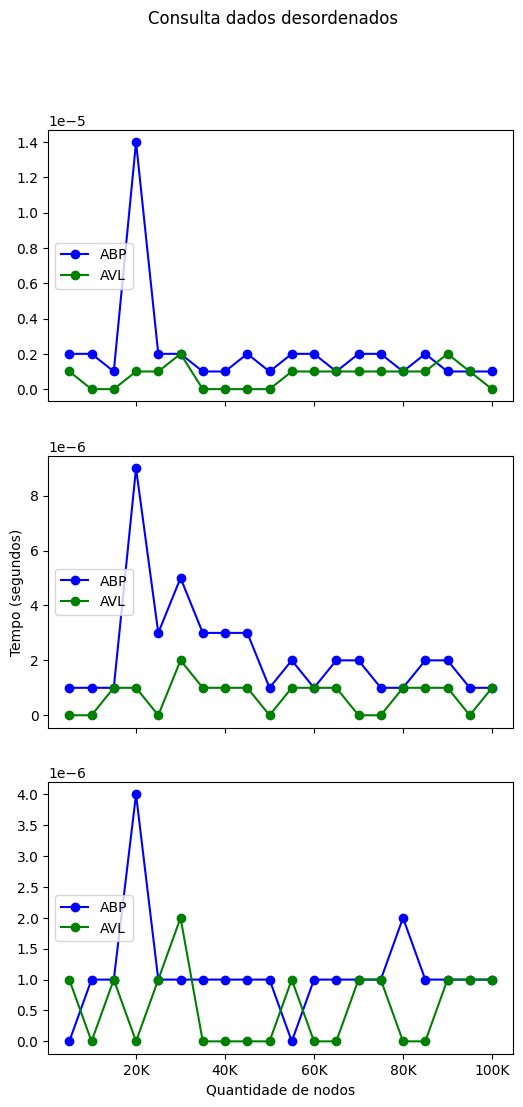

In [26]:
fig, axs = plt.subplots(nrows=3, figsize=(6,12), sharex=True)

x = df_desordered['size']

axs[0].plot(x, df_desordered['abp_fqe'], label='ABP', color='blue', marker='o')
axs[0].plot(x, df_desordered['avl_fqe'], label='AVL', color='green', marker='o')
axs[0].legend(loc='center left')
axs[1].plot(x, df_desordered['abp_mqe'], label='ABP', color='blue', marker='o')
axs[1].plot(x, df_desordered['avl_mqe'], label='AVL', color='green', marker='o')
axs[1].legend(loc='center left')

axs[2].plot(x, df_desordered['abp_lqe'], label='ABP', color='blue', marker='o')
axs[2].plot(x, df_desordered['avl_lqe'], label='AVL', color='green', marker='o')
axs[2].legend(loc='center left')

axs[2].set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
axs[2].xaxis.set_major_formatter(formatter)
axs[1].set_ylabel('Tempo (segundos)')
plt.suptitle('Consulta dados desordenados')
plt.show()

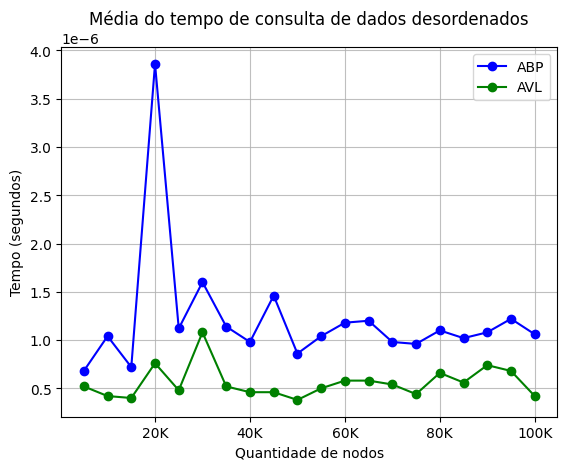

In [27]:
fig, ax = plt.subplots()

x = df_desordered['size']
y0 = df_desordered['abp_rand_mean']
y1 = df_desordered['avl_rand_mean']

ax.plot(x, y0, label='ABP', color='blue', marker='o')
ax.plot(x, y1, label='AVL', color='green', marker='o')

ax.set_title('Média do tempo de consulta de dados desordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()

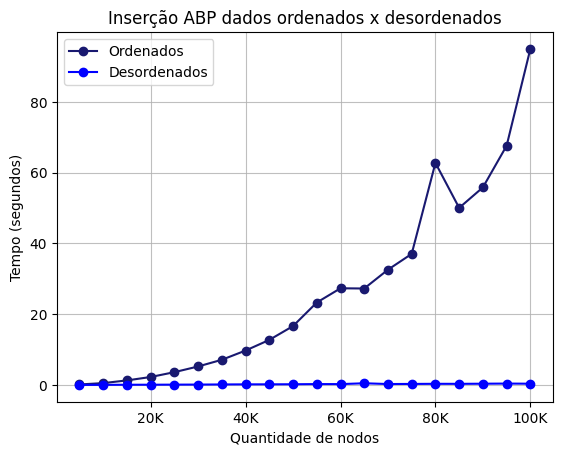

In [28]:
fig, ax = plt.subplots()

x = df_ordered['size']
y0 = df_ordered['abp_insert']
y1 = df_desordered['abp_insert']

ax.plot(x, y0, label='Ordenados', color='midnightblue', marker='o')
ax.plot(x, y1, label='Desordenados', color='blue', marker='o')

ax.set_title('Inserção ABP dados ordenados x desordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()

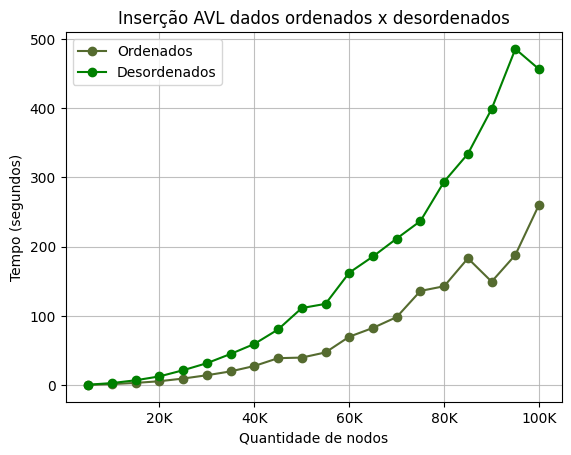

In [29]:
fig, ax = plt.subplots()

x = df_ordered['size']
y0 = df_ordered['avl_insert']
y1 = df_desordered['avl_insert']

ax.plot(x, y0, label='Ordenados', color='darkolivegreen', marker='o')
ax.plot(x, y1, label='Desordenados', color='green', marker='o')

ax.set_title('Inserção AVL dados ordenados x desordenados')
ax.set_xlabel('Quantidade de nodos')
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1000:.0f}K")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Tempo (segundos)')

ax.grid(axis='both', alpha=0.8)
ax.legend()

plt.show()